# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy import stats
import os
import sys
import csv
from datetime import datetime

# Used to navigate to project root for api_keys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List to holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Save query information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Add weather detail columns
city_name = []
city_id = []
lat = []
lon = []
unix_dt = []
temp_max = []
humidity = []
cloudiness = []
windspeed = []

for city in cities:
    try:
        # Build query URL and request your results in Celsius
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        
        # Get weather data
        weather_response = requests.get(query_url).json()
        
        print(f"City Name:  {city}, City Number:  {weather_response['id']}")
        
        # cityID, cityName, lat, lon, unix_dt, temp, humidity, cloudiness, windSpeed
        city_id.append(weather_response['id'])
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        unix_dt.append(weather_response['dt'])
        temp_max.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
        
    except:
        print("City not found")
        pass

In [ ]:
# Print the city count to confirm sufficient dataset (500+)
len(city_name)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#Save data tp dataframe
city_weather_data = pd.DataFrame({
    'city_name':city_name,
    'city_id':city_id,
    'lat':lat,
    'lon':lon,
    'unix_dt':unix_dt,
    'temp_max_c':temp_max,
    'temp_max_f':list(map(lambda x: ((x * (9/5)) + 32), temp_max)),
    'humidity':humidity,
    'cloudiness':cloudiness,
    'windspeed':windspeed
})

# write dataframe to the csv
city_weather_data.to_csv(output_data_file, sep=',', encoding='utf-8', index=False)

# Display dataframe
city_weather_data

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [28]:
# Load in csv file for test purposes
city_weather_data_csv = './output_data/cities.csv'


# Read and display the CSV with Pandas
city_weather_data = pd.read_csv(city_weather_data_csv)
city_weather_data.head()

,city_name,city_id,lat,lon,unix_dt,temp_max_c,temp_max_f,humidity,cloudiness,windspeed
0,Punta Arenas,3874787,-53.15,-70.92,1579899124,9.0,48.2,87,90,2.1
1,Avarua,4035715,-21.21,-159.78,1579899186,28.0,82.4,83,90,3.6
2,Bainbridge Island,5816320,47.63,-122.52,1579899187,12.0,53.6,81,90,5.1
3,Puerto Ayora,3652764,-0.74,-90.35,1579899187,30.0,86.0,58,20,8.7
4,Vaini,4032243,-21.20,-175.20,1579899187,27.0,80.6,78,20,5.1


In [19]:
# Create a 'plotMyData' function to draw a scatter plot and save the image to the './output' directory
def plotMyData(x_values, y_values, x_label, y_label, image_title, png_file_name, timestamp):
    
    # Date capture timestamp
    date_time = datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')
    
    # Plot the 'x' vs 'y' scatter plot
    lattitude_vs_temperature_scatter = plt.scatter(x_values, y_values, marker='o', color='blue')
    
    # Print chart title, x-axis label, and y-axis label
    plt.title(f'{image_title}\n({date_time})')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the plot and display it
    plt.savefig(f"./output_data/{png_file_name}.png")
    plt.show()


#### Latitude vs. Temperature Plot

In [20]:
# Initialize reusable variables for this data set
lattitude = city_weather_data['lat']
data_capture_datetime = city_weather_data['unix_dt'][0]

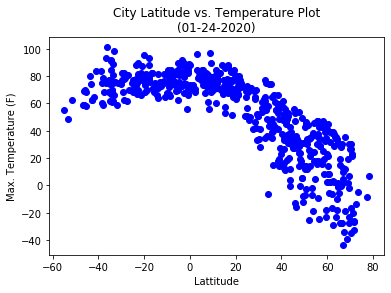

In [21]:
# Call the 'plotMyData' function to plot Lattitute vs. Max Temperature (F)
plotMyData(
    lattitude,
    city_weather_data['temp_max_f'],
    'Lattitude',
    'Max. Temperature (F)',
    'City Latitude vs. Temperature Plot',
    'lattitude_vs_temperature_scatter',
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

#### Latitude vs. Humidity Plot

In [ ]:
# temp_max_c
# temp_max_f
# humidity
# cloudiness
# windspeed
# Call the 'plotMyData' function to plot Lattitute vs. Humidity
plotMyData(
    lattitude,
    city_weather_data['humidity'],
    'Lattitude',
    'Humidity',
    'City Latitude vs. Humidity Plot',
    'lattitude_vs_humidity_scatter',
    data_capture_datetime
)

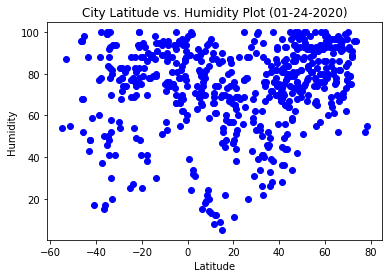

In [22]:
# Isolate data points to plot
lattitude = city_weather_data['lat']
humidity = city_weather_data['humidity']

# Plot the lattitude vs tempretature (c) scatter plot
lattitude_vs_humidity_scatter = plt.scatter(lattitude, humidity, marker="o", color="blue")

# Use timestamp for first city returned in dataset
date_time = datetime.utcfromtimestamp(data_capture_datetime).strftime('%m-%d-%Y')

# Print chart title, x-axis label, and y-axis label
plt.title(f"City Latitude vs. Humidity Plot ({date_time})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the plot and display it
plt.savefig("./output_data/lattitude_vs_humidity_scatter.png")
plt.show()

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

#### Latitude vs. Cloudiness Plot

In [ ]:
# temp_max_c
# temp_max_f
# humidity
# cloudiness
# windspeed
# Call the 'plotMyData' function to plot Lattitute vs. Cloudiness
plotMyData(
    lattitude,
    city_weather_data['Cloudiness'],
    'Lattitude',
    'Cloudiness',
    'City Latitude vs. Cloudiness Plot',
    'lattitude_vs_cloudiness_scatter',
    data_capture_datetime
)

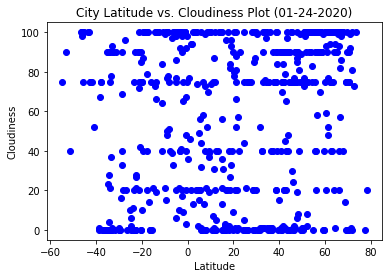

In [23]:
# Isolate data points to plot
lattitude = city_weather_data['lat']
cloudiness = city_weather_data['cloudiness']

# Plot the lattitude vs tempretature (c) scatter plot
lattitude_vs_cloudiness_scatter = plt.scatter(lattitude, cloudiness, marker="o", color="blue")

# Use timestamp for first city returned in dataset
date_time = datetime.utcfromtimestamp(data_capture_datetime).strftime('%m-%d-%Y')

# Print chart title, x-axis label, and y-axis label
plt.title(f"City Latitude vs. Cloudiness Plot ({date_time})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the plot and display it
plt.savefig("./output_data/lattitude_vs_cloudiness_scatter.png")
plt.show()

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

#### Latitude vs. Wind Speed Plot

In [ ]:
# temp_max_c
# temp_max_f
# humidity
# cloudiness
# windspeed
# Call the 'plotMyData' function to plot Lattitute vs. Windspeed
plotMyData(
    lattitude,
    city_weather_data['Windspeed'],
    'Lattitude',
    'Windspeed',
    'City Latitude vs. Windspeed Plot',
    'lattitude_vs_windspeed_scatter',
    data_capture_datetime
)

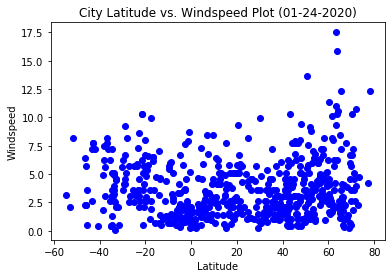

In [24]:
# Isolate data points to plot
lattitude = city_weather_data['lat']
windspeed = city_weather_data['windspeed']

# Plot the lattitude vs tempretature (c) scatter plot
lattitude_vs_windspeed_scatter = plt.scatter(lattitude, windspeed, marker="o", color="blue")

# Use timestamp for first city returned in dataset
date_time = datetime.utcfromtimestamp(data_capture_datetime).strftime('%m-%d-%Y')

# Print chart title, x-axis label, and y-axis label
plt.title(f"City Latitude vs. Windspeed Plot ({date_time})")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

# Save the plot and display it
plt.savefig("./output_data/lattitude_vs_windspeed_scatter.png")
plt.show()

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

## Linear Regression

In [25]:
# 01-Lesson-Plans/05-Matplotlib/3/Activities/09-Stu_Fits_and_Regression

# OPTIONAL: Create a function to create Linear Regression plots
def linearRegression(x_regression_values, y_regression_values, x_label, y_label, image_title, png_file_name):
    # Perform a linear regression on x_regression_value versus y_regression_value
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_regression_values, y_regression_values)
    
    # Create equation of line
    vc_fit = vc_slope * x_regression_values + vc_int
    
    # Plot the linear model on top of scatter plot
    plt.title(f"{image_title} ({date_time})")
    plt.scatter(x_regression_values,y_regression_values)
    plt.plot(x_regression_values,vc_fit,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"./output_data/{png_file_name}.png")
    plt.show()
    


In [26]:
# Create Northern and Southern Hemisphere DataFrames

# Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_hemi_weather_data = city_weather_data[city_weather_data['lat'] >= 0]
#north_hemi_weather_data

# Southern Hemisphere (less than 0 degrees latitude):
south_hemi_weather_data = city_weather_data[city_weather_data['lat'] < 0]
#south_hemi_weather_data

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

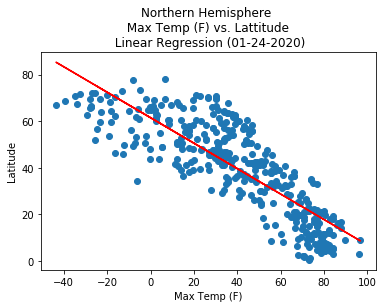

In [27]:
north_hemi_max_temp = north_hemi_weather_data['temp_max_f']
north_hemi_lattitude = north_hemi_weather_data['lat']

linearRegression(
    north_hemi_max_temp, # x_regression_value
    north_hemi_lattitude, # y_regression_value
    'Max Temp (F)', # x_label
    'Latitude', # y_label
    'Northern Hemisphere \n Max Temp (F) vs. Lattitude \n Linear Regression', # Image title
    'north_hemisphere_temperature_vs_lattitude' # .png file name
)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression